<a href="https://colab.research.google.com/github/mhdykz/colorQuantization/blob/ipynbFiles/task3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
image_path = 'lena.png'
image = Image.open(image_path)
image_array = np.array(image)

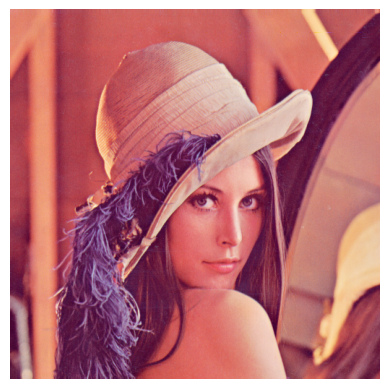

type of array <class 'numpy.ndarray'>
size of array: (262144, 3)
how many D? 2 D


In [4]:
plt.imshow(image_array)
plt.axis('off')
plt.show()

reshaped_image = image_array.reshape(-1, 3)

print("type of array", type(reshaped_image))
print("size of array:", reshaped_image.shape)
print("how many D?", reshaped_image.ndim, "D")

Chosing Random k-point

In [5]:
def distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

def findNearestPointDistance(k_points, points):
    k_points_array = np.array(k_points)
    distances = np.linalg.norm(points[:, np.newaxis] - k_points_array, axis=2)
    return distances.min(axis=1)

def makeKRandomPoints(k = int, array = [])->list:
    random_index = np.random.randint(array.shape[0])
    first_point = array[random_index]
    k_points = [first_point]

    for i in range(1, k):  # it's k-1 loop
        weight_distance = findNearestPointDistance(k_points, reshaped_image)

        sumDis = weight_distance.sum()
        weight_distance /= sumDis

        random_pixel_index = np.random.choice(reshaped_image.shape[0], p=weight_distance)
        k_points.append(reshaped_image[random_pixel_index])
        
    return k_points

k_points = makeKRandomPoints(16, reshaped_image)


In [6]:
k_pointsCopy = [x for x in k_points]

In [7]:
def makeCluster(k_points, array):
    # Initialize clusters as a list of empty lists
    clusters = [[] for _ in range(len(k_points))]
    
    # Convert k_points and array to NumPy arrays for efficient computation
    k_points_array = np.array(k_points)
    array = np.array(array)

    # Calculate distances for all points in one go
    for point in array:
        # Calculate distances from the point to all k_points
        distances = np.linalg.norm(k_points_array - point, axis=1)
        min_index = np.argmin(distances)  # Get the index of the closest centroid
        clusters[min_index].append(point.tolist())  # Append the point to the appropriate cluster
    
    return clusters


In [8]:
#print(len(clusters[0]))

In [9]:
def move_k_point():
    clusters = [[[0,1,50],[1,1,1]], [[110,100,60],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]]]
    for i in range(0, len(clusters)):
        red, blue, green = 0, 0, 0
        for point in clusters[i]:
            red += point[0]
            blue += point[1]
            green += point[2]
        
        red = red // len(clusters[i])
        green = green // len(clusters[i])
        blue = blue // len(clusters[i])
    
        k_points[i] = np.array([red, green, blue], dtype=np.uint8)

In [10]:
class my_K_Mean:
    def __init__(self, k, max_iter = -1) -> None:
        self.k = k
        self.max_iter = max_iter
        self.iterCounter = 0
        
    def fit(self, array):
        while True:
            k_points = makeKRandomPoints(self.k, array)
            clusters = makeCluster(k_points, array)
            move_k_point()
            
            self.iterCounter += 1
            flag = True
            for i in range(0, self.k):
                if k_points[i][0] != k_pointsCopy[i][0]:
                    flag = False
                    break
                if k_points[i][1] != k_pointsCopy[i][1]:
                    flag = False
                    break
                if k_points[i][2] != k_pointsCopy[i][2]:
                    flag = False
                    break
                
            if flag == True or (self.iterCounter >= self.max_iter and self.max_iter!=-1) :
                return k_points
            
k_mean = my_K_Mean(16,10)
k_points = k_mean.fit(reshaped_image)

KeyboardInterrupt: 

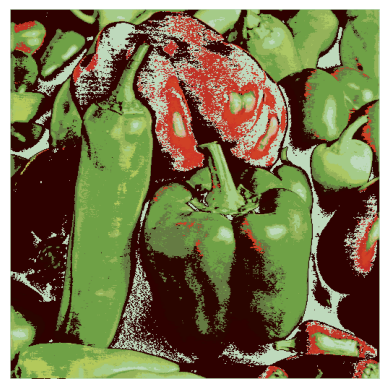

(512, 512, 3)

In [ ]:
def replace_colors(image, k_points):
    # Reshape the image to a 2D array of pixels
    pixel_array = image.reshape(-1, 3)  # Shape: (262144, 3) for a 512x512 image

    # Convert k_points to a NumPy array for efficient computation
    k_points_array = np.array(k_points)

    # Find the closest k_point for each pixel
    distances = np.linalg.norm(pixel_array[:, np.newaxis] - k_points_array, axis=2)
    closest_indices = np.argmin(distances, axis=1)

    # Replace each pixel with the closest k_point color
    quantized_pixels = k_points_array[closest_indices]

    # Reshape back to the original image shape
    quantized_image = quantized_pixels.reshape(image.shape)

    return quantized_image
a = replace_colors(image_array, k_points)
plt.imshow(a)
plt.axis('off')
plt.show()
a.shape

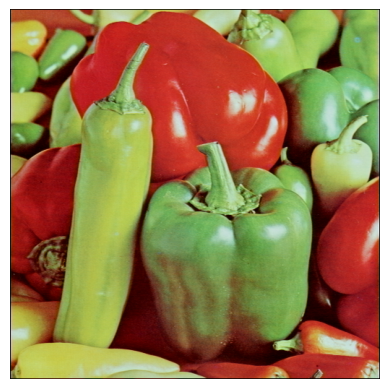

NameError: name 'replace_colors' is not defined

In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
from PIL import Image

def distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))
def showImage(image_array):
    plt.imshow(image_array)  
    plt.axis('off')  
    plt.show() 
  
class MyKMeans:  
    def __init__(self, n_clusters, max_iterations=-1, random_choose= 'random', visualization = False, log_flag = False):  
        self.n_clusters = n_clusters  
        self.random_choose = random_choose
        self.max_iterations = max_iterations  
        self.log_flag = log_flag
        self.visualization = visualization
        self.reshaped_array = []

    def initialize_k_points(self, array):  
        if self.random_choose == 'k_mean++':
            k_points_array = np.array(k_points)
            distances = np.linalg.norm(array[:, np.newaxis] - k_points_array, axis=2)
            return distances.min(axis=1)
        
        elif self.random_choose == 'random':
            random_indices = np.random.choice(len(array), self.n_clusters, replace=False)  
            return array[random_indices]  


    def compute_clusters(self, k_points, array):  
        clusters = [[] for _ in range(len(k_points))]  
        distances = np.linalg.norm(array[:, np.newaxis] - k_points, axis=2)  
        closest_indices = np.argmin(distances, axis=1)  

        for idx, label in enumerate(closest_indices):  
            clusters[label].append(idx)  

        return clusters  


    def move_k_point(self, clusters, array):  
        new_points = []  
        for cluster in clusters:  
            if len(cluster) > 0:  
                new_points.append(np.mean(array[cluster], axis=0))  
            else:  
                new_points.append(np.random.choice(array, 1)[0])  
        return np.array(new_points)  
    
    
    def replace_colors(self, image_array, k_points):  
        distances = np.linalg.norm(self.reshaped_array[:, np.newaxis] - k_points[np.newaxis, :, :], axis=2)  
        closest_indices = np.argmin(distances, axis=1)  
        quantized_image = k_points[closest_indices].astype(np.uint8)
        return quantized_image.reshape(image_array.shape)  


    def fit(self, image_array):  
        self.reshaped_array = image_array.reshape(-1, 3)  
        
        # Open the log file if logging is enabled  
        if self.log_flag:  
            log_file = open('L2_norm_log.txt', 'w')  # 'w' mode to overwrite existing content  
    
        k_points = self.initialize_k_points(self.reshaped_array)  
        iteration = 0  
    
        while True:  
            if iteration == self.max_iterations:  
                break  
                
            clusters = self.compute_clusters(k_points, self.reshaped_array)  
            k_points_new = self.move_k_point(clusters, self.reshaped_array)  
    
            # Check for convergence  
            if np.all(k_points_new == k_points):  
                break  
            
            k_points = k_points_new  
            iteration += 1  
            
            # Log the current state if logging is enabled  
            if self.log_flag:  
                log_entry = str(replace_colors(image_array, k_points)) + "\n"  # Ensure you have line breaks  
                log_file.write(log_entry)  
    
            # Visualize the current state if visualization is enabled  
            if self.visualization:  
                showImage(replace_colors(image_array, k_points))  
    
        # Close the log file if it was opened  
        if self.log_flag:  
            log_file.close()  
    
        return replace_colors(image_array, k_points)
    

   
    
 

def main():  
    image_path = 'peppers.tif'
    image = Image.open(image_path)
    image = np.array(image)
    plt.imshow(image)  
    plt.axis('off')  
    plt.show()  
   

    
    k_mean = MyKMeans(16, 5)  
    showImage(k_mean.fit(image))

if __name__ == "__main__":  
    main()